## Тема 2. Сглаживающая аппроксимация в полиномиальных базисах. Продолжение.

In [3]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1
mpl.rcParams['figure.dpi'] = default_dpi * factor

### Функции вычисления коэффициентов разложения

In [4]:
# x(n), y(n) - массив данных
# m - степень полинома (количество базисных функций - 1)

def SqLeast (x, y, m):
    global G, Phi
    n = len(x)
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    G = PhiT @ Phi
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    return a

def SqLeastReg (x, y, m, alpha):
    global G
    n = len(x)
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    
    RegAlpha = np.eye (m+1) * alpha
        
    G = PhiT @ Phi + RegAlpha 
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    return a

def BasicFunctions (num, x):
    PhiFun = x**num
    return PhiFun

### Функция вычисления погрешности аппроксимации

In [5]:
def AppError (x,y,Coefs):
    
    PolynomValue = np.zeros(len(x))
    for i in range (0, m+1):
        PolynomValue += Coefs[i]*x**i
   
    y_av = np.sum(y)/len(x)
    y_disp = np.sum((y-y_av)**2)/len(x)
    
    ResLocal = (y - PolynomValue)
    ResLocalRel = ResLocal/y_disp**0.5
    ResGlobal = (np.sum ((ResLocal)**2)/len(x))**0.5
    ResGlobalRel = ResGlobal / y_disp**0.5
    
    yv_disp = np.sum((PolynomValue-y_av)**2)/len(x)
    
    R2 = yv_disp/y_disp
        
    return ResLocal, ResLocalRel, ResGlobal, ResGlobalRel

def R2 (x, y, Coefs):
    PolynomValue = np.zeros(len(x))
    
    for i in range (0, m+1):
        PolynomValue += Coefs[i]*x**i
   
    y_av = np.sum(y)/len(x)
    y_disp = np.sum((y-y_av)**2)/len(x)    
      
    yv_disp = np.sum((PolynomValue-y_av)**2)/len(x)
    
    R2 = yv_disp/y_disp
        
    return R2

### Формирование набора данных

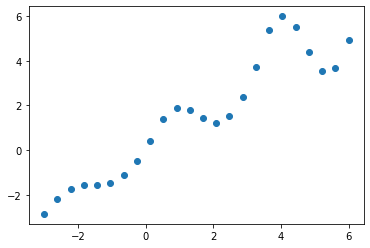

In [6]:
xleft = -3
xright = 6
n = 24
x = np.linspace(xleft,xright,n)
yf = np.zeros ((n))
y = np.zeros ((n))
for i in range(0,n):
    if (x[i]<0) :
        yf[i] = 1.0*x[i] + 0.5*np.sin(2*x[i])
    elif (x[i]<np.pi):
        yf[i] = 1.0*x[i] + 1.0*np.sin(2*x[i])
    else:
        yf[i] = 1.0*x[i] + 2.0*np.sin(2*x[i])
plt.plot (x,yf, 'o')

### Зашумление данных

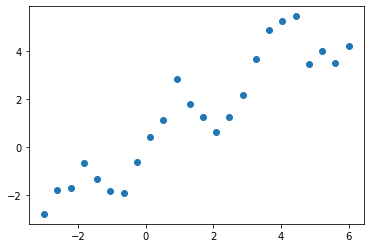

In [7]:
Delta = 0.5 * np.random.randn(len(x))
y = yf + Delta
plt.plot (x, y, 'o')

### Построение аппроксимационного полинома и оценка погрешности аппроксимации

Коэффициенты [ 7.77749557e-02  3.17942578e+00 -1.35737669e-01 -1.43637814e+00
  1.25801806e-01  2.41692009e-01 -3.20652693e-02 -1.28531129e-02
  2.34688978e-03  6.25448921e-05 -2.01829318e-05]
Число обусловленности 6281660001150856.0 79261668.16947378
Максимальное и минимальное собственные значения G 5032160201183615.0 0.8011434992681011


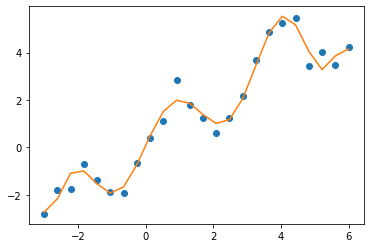

In [8]:
m = 10

PolynomCoefs = SqLeast (x, y, m)
print ('Коэффициенты', PolynomCoefs)

#print ('Gmatrix',G)
cond = np.linalg.cond (G)
condPhi = np.linalg.cond (Phi)
EigG = np.linalg.eigvals (G)
print ('Число обусловленности', cond, condPhi)
print ('Максимальное и минимальное собственные значения G', max (EigG), min (EigG))

PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i   

ResLocal, ResLocalRel, ResGlobal, ResGlobalRel = AppError (x,y,PolynomCoefs)

plt.plot (x, y, 'o')
plt.plot (x, PolynomValue)

### Оценка погрешности

Погрешность аппроксимации
Суммарная абсолютная, cуммарная относительная, коэффициент детерминации
0.3579080676236081 0.14221918707532383 0.9797737027411502
0.9999999999135161


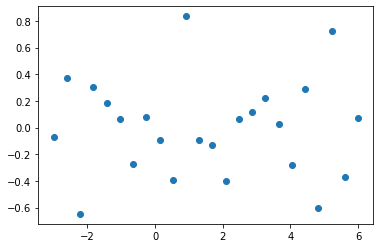

In [9]:
ResLocal, ResLocalRel, ResGlobal, ResGlobalRel = AppError (x,y,PolynomCoefs)
R2 = R2 (x,y,PolynomCoefs)
plt.plot (x, ResLocal, 'o')
print ('Погрешность аппроксимации')
print ('Суммарная абсолютная, cуммарная относительная, коэффициент детерминации')
print (ResGlobal, ResGlobalRel, R2)
print (ResGlobalRel**2+R2)

### Разделение данных на обучающий и тестовый наборы

[12 16  3  7 17 11]
0.38438012692790247 0.4316321362537705


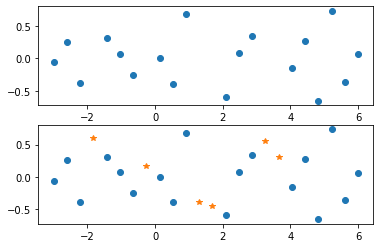

In [10]:
n = len(x)
ntest = int (n/4)
ntrain = n - ntest
xtrain = np.zeros (ntrain)
xtest = np.zeros (ntest)
ytrain = np.zeros (ntrain)
ytest = np.zeros (ntest)
#indtest = np.random.random_integers(0,n, ntest)
indtest = np.random.choice (len(x), ntest, replace = False)
print (indtest)

itest = -1
itrain = -1
for i in range (0,n):
    
    ktest = 0
    
    for k in range (0, ntest): 
        if (i==indtest[k]):
            itest += 1
            xtest [itest] = x[i]
            ytest [itest] = y[i]
            ktest = 1
            
    if (ktest !=1 ):
        itrain += 1
        xtrain [itrain] = x[i]
        ytrain [itrain] = y[i]
             
#print (xtest)
#print (xtrain)

PolynomCoefsTrain = SqLeast (xtrain, ytrain, m)
    
ResLocalTrain, ResLocalRelTrain, ResGlobalTrain, ResGlobalRelTrain = AppError (xtrain,ytrain,PolynomCoefsTrain)
ResLocalTest, ResLocalRelTest, ResGlobalTest, ResGlobalRelTest = AppError (xtest,ytest,PolynomCoefsTrain)    
    
print (ResGlobalTrain, ResGlobalTest)
 
plt.subplot (2,1,1)
plt.plot (xtrain, ResLocalTrain, 'o')
plt.subplot (2,1,2)
plt.plot (xtrain, ResLocalTrain, 'o')
plt.plot (xtest, ResLocalTest, '*')
#num_bins = 20
#plt.hist(ErrorLocalTrain, num_bins, density=1)

### Проблема обусловленности

In [11]:
n = 4
# Формирование матрицы Гильберта
MM = np.zeros ((n,n))
for i in range (0,n):
    for j in range (0,n):
        MM[i,j]=1/(i+j+1) #*10.
print (MM)
# Нахождение собственных значений матрицы
Evv = np.linalg.eigvals (MM)
print ('Eigen values', Evv)
# Формирование правой части
b = np.linspace (1,5,n)/n
print ('b',b)
# Нахождение решения системы уравнений
xx = np.linalg.solve(MM, b)
print ('solution',xx)
# Вычиление невязки
res = MM @ xx - b
print ('Residual', res)

MMinv = np.linalg.inv(MM)
normb = np.linalg.norm (b)
normM = np.linalg.norm (MM)
normMi = np.linalg.norm (MMinv)
normx = np.linalg.norm (xx)

#число обусловленности
cond = np.linalg.cond (MM)
print ('cond', cond, normM * normMi, max(Evv)/min(Evv))

#возмущение правой части
Del = (np.random.random(n)- 0.5) * 0.01
normDel = np.linalg.norm (Del)
b2 = b + Del
# Решение возмущенной системы
xx2 = np.linalg.solve(MM, b2)
print ('b', b2, )
print ('solution', xx2)
dx = xx-xx2
normdx = np.linalg.norm (dx)
res = MM @ xx2 - b2
print ('residual', res)

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]
Eigen values [1.50021428e+00 1.69141220e-01 6.73827361e-03 9.67023040e-05]
b [0.25       0.58333333 0.91666667 1.25      ]
solution [ -21.  295. -825.  595.]
Residual [ 0.00000000e+00  9.54791801e-15 -9.43689571e-15  1.42108547e-14]
cond 15513.738738928138 15613.793559642725 15513.738738933438
b [0.24608813 0.58305291 0.91853936 1.24644659]
solution [ -20.08201666  284.10693104 -798.12236849  577.26171508]
residual [ 1.05471187e-15  3.88578059e-15 -1.01030295e-14  1.33226763e-14]


## Пример 3

In [15]:
def SqLeastRegMy(x, y, m, alpha):
    global G, Phi
    
    n = len(x)
    
    Phi = np.zeros ((n,m+1))
    
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    
    PhiT = Phi.T
    
    G = PhiT @ Phi
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    
    eps = 0.001
    
    for i in range(0, 10):
        
        a_i = a
        a = np.linalg.solve(G, z - alpha* np.sign(a_i))
        e = a - a_i
        epsit = (sum(e**2))**0.5/len(e)
        
        print ('iteration', i, a, np.sign(a), epsit)
        
        if (epsit <= eps):
            break
         
    return a

Коэффициенты точные [-5  4 -3  2 -1  0  0  0  0  1 -3  4 -5  6 -8]
Коэффициенты МНК [-5.00122946e+00  1.06059087e+01 -1.21077763e+02  8.48111933e+02
 -3.24919031e+03  7.34830264e+03 -1.01128713e+04  8.25437452e+03
 -3.34677599e+03 -1.43480062e+02  7.91897644e+02 -3.12153750e+02
  2.32802375e+01  1.59732085e+01 -9.95928989e+00]
1.5754259699863257e+20
iteration 0 [ 8.40925418e+00 -2.20321493e+05  5.79600901e+06 -5.80716609e+07
  3.02609306e+08 -9.32180403e+08  1.80425556e+09 -2.23451531e+09
  1.71164032e+09 -6.73287621e+08 -3.97492984e+07  1.89219840e+08
 -9.53742832e+07  2.18903228e+07 -2.01249455e+06] [ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.] 237041285.44150156
iteration 1 [ 1.48416887e+01  2.12206422e+05 -5.74322186e+06  5.87866242e+07
 -3.11149197e+08  9.68663759e+08 -1.88548366e+09  2.33371181e+09
 -1.76483120e+09  6.52585428e+08  9.52497424e+07 -2.30730458e+08
  1.11735166e+08 -2.53224010e+07  2.31544849e+06] [ 1.  1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1. 

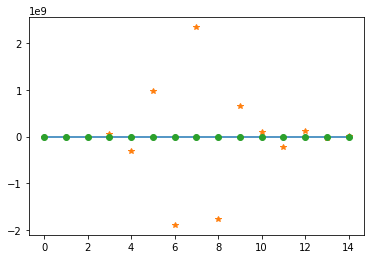

In [23]:
xleft = 0.0
xright = 2.0
n = 24
x = np.linspace(xleft,xright,n)
yf = np.zeros ((n))
y = np.zeros ((n))

coefs = np.array ([-5, 4, -3, 2,-1,0,0,0,0, 1, -3, 4, -5, 6, -8])
m = len(coefs)- 1

print ('Коэффициенты точные', coefs)

for i in range (0, m+1):
    yf += coefs[i]*x**i
#plt.plot (x,yf, 'o')

Delta = 0.1 * np.random.randn(len(x))
y = yf + Delta
#plt.plot (x, y, '*')

PolynomCoefs = SqLeast (x, y, m)
print ('Коэффициенты МНК', PolynomCoefs)

#print ('Gmatrix',G)
cond = np.linalg.cond (G)
print (cond)

PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
        
#plt.plot (x, y, 'o')
#plt.plot (x, PolynomValue)
#plt.subplot (x, ErrorLocal)

CoefsReg = SqLeastRegMy (x, y, m, 0.01)
print ('Коэффициенты МНК с регуляризацией', CoefsReg)
cond = np.linalg.cond (G)
print (cond)

PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += CoefsReg[i]*x**i
#plt.plot (x, PolynomValue)

PhiInv = np.linalg.pinv(Phi, rcond = 1e-2)
CoefsSVD = PhiInv @ y
#print ('коэффициенты МНК SVD', CoefsSVD )

U, s, Vh = np.linalg.svd(Phi)
print ('s', s)
#smat = np.diag(s)

#plt.subplot (2,1,1)
plt.plot (coefs)
plt.plot (CoefsReg, '*')
#plt.plot (PolynomCoefs, 'v')
plt.plot (CoefsSVD, 'o')
#plt.plot (coef2, '-')
#plt.subplot (2,1,2)
#plt.plot (coefs)
#plt.plot (coef2)